# 서울시 업무추진비 데이터 병합
* 업무추진비 데이터 공개 위치 : [부서별 집행 현황 | 서울시 업무추진비 | 업무추진비 | 서울시 정보소통광장(정보공개)](http://opengov.seoul.go.kr/expense)
* 서울시 정보소통광장에 있는 일부 데이터는 github을 통해 공개되어 있으며, 여기 있는 데이터는 깃헙 데이터를 병합했다.
* github : https://github.com/seoul-opengov/opengov

In [1]:
%ls expense_list2018/*.csv

expense_list2018/201801_expense_list.csv
expense_list2018/201802_expense_list.csv
expense_list2018/201803_expense_list.csv
expense_list2018/201804_expense_list.csv
expense_list2018/201805_expense_list.csv
expense_list2018/201806_expense_list.csv
expense_list2018/201807_expense_list.csv
expense_list2018/201808_expense_list.csv
expense_list2018/201809_expense_list.csv
expense_list2018/201810_expense_list.csv
expense_list2018/201811_expense_list.csv


In [2]:
import pandas as pd
from glob import glob

In [3]:
def get_file_list_by_year(year):
    file_list = []
    for file in glob('expense_list'+ str(year) +'/*.csv'):
        file_list.append(file)
    return sorted(file_list)
        
get_file_list_by_year(2018)

['expense_list2018/201801_expense_list.csv',
 'expense_list2018/201802_expense_list.csv',
 'expense_list2018/201803_expense_list.csv',
 'expense_list2018/201804_expense_list.csv',
 'expense_list2018/201805_expense_list.csv',
 'expense_list2018/201806_expense_list.csv',
 'expense_list2018/201807_expense_list.csv',
 'expense_list2018/201808_expense_list.csv',
 'expense_list2018/201809_expense_list.csv',
 'expense_list2018/201810_expense_list.csv',
 'expense_list2018/201811_expense_list.csv']

In [4]:
filename = "expense_list2018/201801_expense_list.csv"
df1 = pd.read_csv(filename)
df1.shape

(6713, 18)

In [5]:
def concat_data(year):
    df_lists = []
    # 파일별로 데이터를 가져온다.
    files = get_file_list_by_year(year)
    for filename in sorted(files):
        df_temp = pd.read_csv(filename)
        # 해당 데이터프레임이 비어있지 않다면 병합하기 위해 리스트에 담는다.
        if not df_temp.empty :
            print(filename, df_temp.shape)
            df_lists.append(df_temp)
    # 리스트가 비어있지 않다면 데이터프레임을 합쳐준다.       
    if df_lists :    
        df = pd.concat(df_lists)
    print(df.shape)
    return df        

In [6]:
df_2018 = concat_data(2018)

expense_list2018/201801_expense_list.csv (6713, 18)
expense_list2018/201802_expense_list.csv (6357, 18)
expense_list2018/201803_expense_list.csv (6282, 18)
expense_list2018/201804_expense_list.csv (6034, 18)
expense_list2018/201805_expense_list.csv (5455, 18)
expense_list2018/201806_expense_list.csv (5831, 18)
expense_list2018/201807_expense_list.csv (6425, 18)
expense_list2018/201808_expense_list.csv (7061, 18)
expense_list2018/201809_expense_list.csv (5925, 18)
expense_list2018/201810_expense_list.csv (6706, 18)
expense_list2018/201811_expense_list.csv (6788, 18)
(69577, 18)


In [7]:
df_2017 = concat_data(2017)

expense_list2017/201701_expense_list.csv (5645, 18)
expense_list2017/201702_expense_list.csv (5799, 18)
expense_list2017/201703_expense_list.csv (6192, 18)
expense_list2017/201704_expense_list.csv (5470, 18)
expense_list2017/201705_expense_list.csv (5615, 18)
expense_list2017/201706_expense_list.csv (6268, 18)
expense_list2017/201707_expense_list.csv (5767, 18)
expense_list2017/201708_expense_list.csv (5758, 18)
expense_list2017/201709_expense_list.csv (5966, 18)
expense_list2017/201710_expense_list.csv (5176, 18)
expense_list2017/201711_expense_list.csv (6543, 18)
expense_list2017/201712_expense_list.csv (7484, 18)
(71683, 18)


In [8]:
df_2016 = concat_data(2016)

expense_list2016/201601_expense_list.csv (233, 18)
expense_list2016/201602_expense_list.csv (299, 18)
expense_list2016/201603_expense_list.csv (342, 18)
expense_list2016/201604_expense_list.csv (360, 18)
expense_list2016/201605_expense_list.csv (320, 18)
expense_list2016/201606_expense_list.csv (349, 18)
expense_list2016/201607_expense_list.csv (304, 18)
expense_list2016/201608_expense_list.csv (302, 18)
expense_list2016/201609_expense_list.csv (443, 18)
expense_list2016/201610_expense_list.csv (458, 18)
expense_list2016/201611_expense_list.csv (6608, 18)
expense_list2016/201612_expense_list.csv (8322, 18)
(18340, 18)


In [9]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 69577 entries, (14618781, 2018년 1월 서울시본청 기후환경본부 환경정책과 업무추진비 내역) to (16856748, 2018년 11월 사업소_상수도사업본부_강북아리수정수센터_정수과 업무추진비 내역)
Data columns (total 18 columns):
nid                  69577 non-null object
title                69577 non-null object
url                  69577 non-null object
dept_nm_lvl_1        59988 non-null object
dept_nm_lvl_2        17430 non-null object
dept_nm_lvl_3        3138 non-null object
dept_nm_lvl_4        69577 non-null int64
dept_nm_lvl_5        69577 non-null int64
exec_yr              3512 non-null float64
exec_month           2946 non-null float64
expense_budget       2360 non-null object
expense_execution    69577 non-null object
category             69577 non-null object
exec_dt              68866 non-null object
exec_loc             69577 non-null object
target_nm            69277 non-null object
payment_method       69577 non-null object
exec_amount          69577 non-null int64
dtypes: float64(2), int6

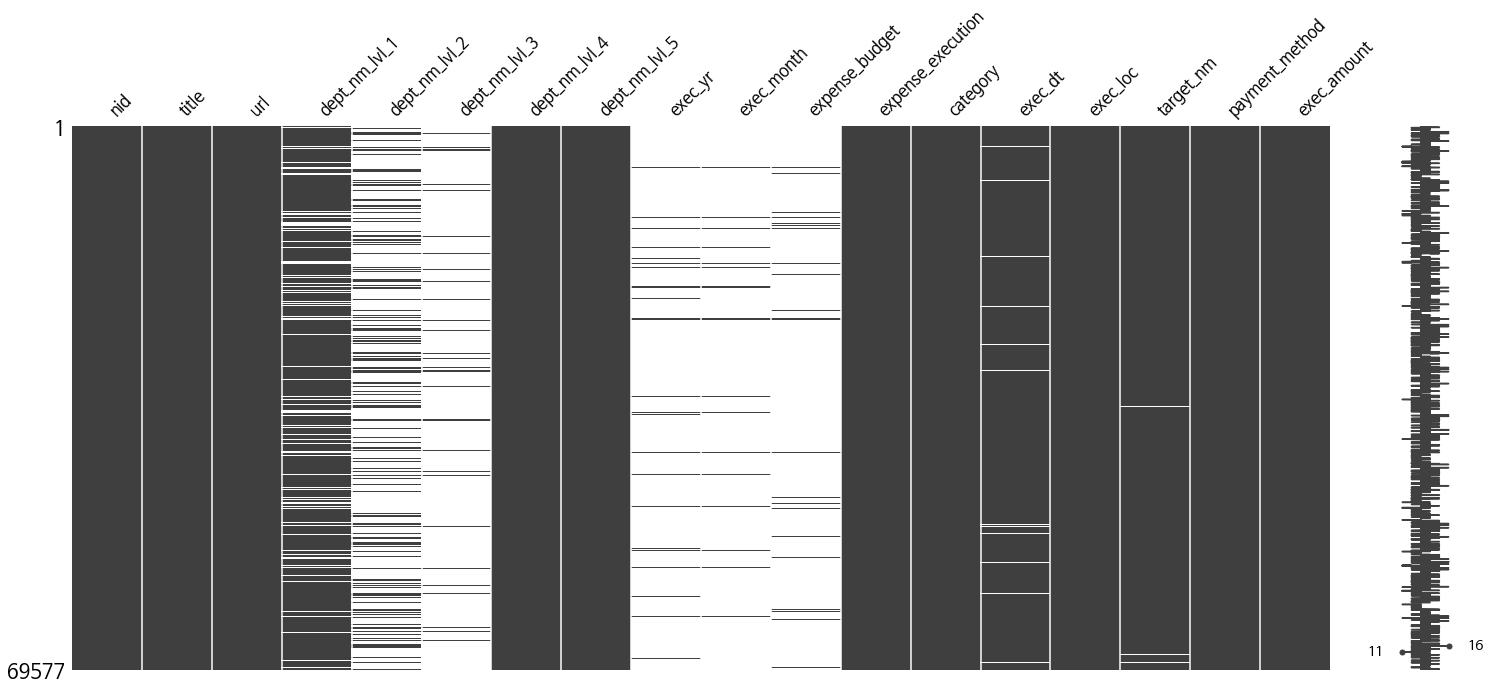

In [10]:
import missingno as msno
msno.matrix(df_2018)

In [11]:
df_2017.tail()

nid  \
15211770 2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  http://opengov.seoul.go.kr/public/15211770   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  http://opengov.seoul.go.kr/public/15211770   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  http://opengov.seoul.go.kr/public/15211770   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  http://opengov.seoul.go.kr/public/15211770   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  http://opengov.seoul.go.kr/public/15211770   

                                           title      url dept_nm_lvl_1  \
15211770 2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  의회사무처  교통전문위원실           NaN   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  의회사무처  교통전문위원실           NaN   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  의회사무처  교통전문위원실           NaN   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  의회사무처  교통전문위원실           NaN   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  의회사무처  교통전문위원실           NaN   

                                          dept_nm_lvl_2 dept_nm_lvl_3  \
15211770 2017년 12월 의회사무처_교통전문위원실 업무추진비 내역           NaN           NaN   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역           NaN           NaN   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역           NaN           NaN   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역           NaN           NaN   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역           NaN           NaN   

                                           dept_nm_lvl_4  dept_nm_lvl_5  \
15211770 2017년 12월 의회사무처_교통전문위원실 업무추진비 내역           2017             12   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역           2017             12   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역           2017             12   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역           2017             12   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역           2017             12   

                                           exec_yr  exec_month expense_budget  \
15211770 2017년 12월 의회사무처_교통전문위원실 업무추진비 내역      NaN         NaN            NaN   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역      NaN         NaN            NaN   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역      NaN         NaN            NaN   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역      NaN         NaN            NaN   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역      NaN         NaN            NaN   

                                          expense_execution          category  \
15211770 2017년 12월 의회사무처_교통전문위원실 업무추진비 내역        시의회교통전문위원실  2017-12-13 21:53   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역        시의회교통전문위원실  2017-12-12 20:33   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역        시의회교통전문위원실  2017-12-12 21:27   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역        시의회교통전문위원실  2017-12-07 13:03   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역        시의회교통전문위원실  2017-12-04 20:49   

                                                    exec_dt     exec_loc  \
15211770 2017년 12월 의회사무처_교통전문위원실 업무추진비 내역     북창터 (중구 세종대로)  입법조사관련  간담회   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  팔팔전어횟집 (노원구 광운로)  입법조사관련  간담회   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역     북창터 (중구 세종대로)  입법조사관련  간담회   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역     잼배옥 (중구 세종대로)  입법조사관련  간담회   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역     북창터 (중구 세종대로)  입법조사관련  간담회   

                                           target_nm payment_method  \
15211770 2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  수석전문위원외 9             카드   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역   전문위원외 11             카드   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  수석전문위원외 2             카드   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  수석전문위원외 2             카드   
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역  수석전문위원외 4             카드   

                                           exec_amount  
15211770 2017년 12월 의회사무처_교통전문위원실 업무추진비 내역       150000  
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역       204000  
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역        43000  
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역        48000  
         2017년 12월 의회사무처_교통전문위원실 업무추진비 내역        98000

In [12]:
df_expense = pd.concat([df_2016, df_2017, df_2018])
df_expense.shape

(159600, 18)

In [13]:
df_expense.to_csv('data/seoul_city_hall_expense.csv')